# US Monster Jobs Dataset Cleansing

Personal checklist:
-> Standarization of data: Fix inconsistent column names and convert into a standard format

In [2]:
import pandas as pd

import numpy as np

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [4]:
df = pd.read_csv('C:\\Users\\jorge\\Desktop\\monster_com-job_sample.csv')

# Overview of dataset

In [5]:
df.shape

(22000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   date_added       122 non-null    object
 3   has_expired      22000 non-null  object
 4   job_board        22000 non-null  object
 5   job_description  22000 non-null  object
 6   job_title        22000 non-null  object
 7   job_type         20372 non-null  object
 8   location         22000 non-null  object
 9   organization     15133 non-null  object
 10  page_url         22000 non-null  object
 11  salary           3446 non-null   object
 12  sector           16806 non-null  object
 13  uniq_id          22000 non-null  object
dtypes: object(14)
memory usage: 2.3+ MB


# 1. Standarization of data
-> Column names/format: I don't see any relevant errors in the column name format. Am I missing something?
 <br />No caps, no format differences between one name and another.

In [7]:
df.columns

Index(['country', 'country_code', 'date_added', 'has_expired', 'job_board',
       'job_description', 'job_title', 'job_type', 'location', 'organization',
       'page_url', 'salary', 'sector', 'uniq_id'],
      dtype='object')

# 2. Data Type Conversion
Data in df is of 'object' type. We'll have to convert the data type of the columns according to the data in each one of them.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   date_added       122 non-null    object
 3   has_expired      22000 non-null  object
 4   job_board        22000 non-null  object
 5   job_description  22000 non-null  object
 6   job_title        22000 non-null  object
 7   job_type         20372 non-null  object
 8   location         22000 non-null  object
 9   organization     15133 non-null  object
 10  page_url         22000 non-null  object
 11  salary           3446 non-null   object
 12  sector           16806 non-null  object
 13  uniq_id          22000 non-null  object
dtypes: object(14)
memory usage: 2.3+ MB


# 2.1 Empty cells per column?

We have a ton of missing data in date_added, job_type, organization, salary and sector.

In [9]:
df.isnull().sum()

country                0
country_code           0
date_added         21878
has_expired            0
job_board              0
job_description        0
job_title              0
job_type            1628
location               0
organization        6867
page_url               0
salary             18554
sector              5194
uniq_id                0
dtype: int64

The only value in the 'Country' column is the US. I guess it makes sense when using a 'US Monster Jobs' dataset.

In [10]:
print(df['country'].value_counts())

print('-----------------------------------')

print(df['country_code'].value_counts())

United States of America    22000
Name: country, dtype: int64
-----------------------------------
US    22000
Name: country_code, dtype: int64


# 2.2 Convert date_added to date dtype

In [11]:
df.loc[df['date_added'].notnull()]

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
133,United States of America,US,5/10/2016,No,jobs.monster.com,"#TrackingJobBody table, #TrackingJobBody a {<b...",Multibed Technician Job in Deer Park,Full Time Employee,"Deer Park, TX",Other/Not Classified,http://jobview.monster.com/Multibed-Technician...,NaN,Other,6f6e952b8b0a2bb55e9feada54db2347
140,United States of America,US,5/13/2016,No,jobs.monster.com,Equal Opportunity Employer: Minority/Female/Di...,Principal Cyber Security Engineer Job in Houston,Full Time Employee,"Houston, TX",Computer SoftwareComputer/IT Services,http://jobview.monster.com/Principal-Cyber-Sec...,NaN,IT/Software Development,1127457851cf28d79a39fd4b35867982
251,United States of America,US,5/9/2016,No,jobs.monster.com,"#TrackingJobBody table, #TrackingJobBody a {<b...",Field Supervisor IS Job in Deer Park,Full Time Employee,"Deer Park, TX",Other/Not Classified,http://jobview.monster.com/Field-Supervisor-IS...,NaN,Other,94b49d291a16d01b27378ca97e653910
279,United States of America,US,6/10/2016,No,jobs.monster.com,"At American Family Insurance, we're firmly com...",Insurance Sales - Customer Service Job in Eden...,Full Time Employee,"Eden Prairie, MN 55344",Insurance,http://jobview.monster.com/insurance-sales-cus...,15.00 - 21.00 $ /hour,Accounting/Finance/Insurance,64a597e5dd17740aadf4b0e8047b51a5
366,United States of America,US,1/2/2017,No,jobs.monster.com,Description The Opportunity The Vehicle Mainte...,Vehicle Maintenance Mechanic - Las Vegas,Full Time Employee,"Las Vegas, NV",Energy and Utilities,http://jobview.monster.com/vehicle-maintenance...,NaN,Installation/Maintenance/Repair,886903d4dda03046c2a826c44bfff3dc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20760,United States of America,US,9/27/2016,No,jobs.monster.com,"#TrackingJobBody table, #TrackingJobBody a {<b...",Central Maintenance Planner Job in Norwell,Full Time Employee,"Norwell, MA",Other/Not Classified,http://jobview.monster.com/central-maintenance...,NaN,Administrative/Clerical,7b115d764f741821bae4ac95bfcf3f04
21342,United States of America,US,3/30/2016,No,jobs.monster.com,"#TrackingJobBody table, #TrackingJobBody a {<b...",Branch Manager Job in Cincinnati,Full Time Employee,"Cincinnati, OH",Other/Not Classified,http://jobview.monster.com/Branch-Manager-Job-...,NaN,Other,1db7d013265871214d3f4e7ed80d8a23
21391,United States of America,US,3/24/2016,No,jobs.monster.com,"#TrackingJobBody table, #TrackingJobBody a {<b...",Field Service Driver Job in Cincinnati,Full Time Employee,"Cincinnati, OH",Other/Not Classified,http://jobview.monster.com/Field-Service-Drive...,NaN,Logistics/Transportation,4f304e6285b240f8442a028bc3716273
21631,United States of America,US,4/4/2016,No,jobs.monster.com,"#TrackingJobBody table, #TrackingJobBody a {<b...",Field Project Manager Job in Cincinnati,Full Time Employee,"Cincinnati, OH",Other/Not Classified,http://jobview.monster.com/Field-Project-Manag...,NaN,Other,6f86e1f35ad082be591bcec15c75f947


In [12]:
lista = [(i + ''': ''' + str(df.dtypes[i])) for i in dict(df.dtypes)]

print(lista)

['country: object', 'country_code: object', 'date_added: object', 'has_expired: object', 'job_board: object', 'job_description: object', 'job_title: object', 'job_type: object', 'location: object', 'organization: object', 'page_url: object', 'salary: object', 'sector: object', 'uniq_id: object']


# Fix salary column

# Visualize full df rows

Code in next cell allows us to view rows in text editor. 

In [13]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df[['salary']].head(15))

                           salary
0                             NaN
1                             NaN
2                             NaN
3                             NaN
4                             NaN
5                             NaN
6                             NaN
7                             NaN
8                             NaN
9                             NaN
10                            NaN
11                            NaN
12                            NaN
13           9.00 - 13.00 $ /hour
14  80,000.00 - 95,000.00 $ /year


I wanted to have a better idea of the data in the column.

The "Salary" column is a mess. We got:\
80,000.00 - 95,000.00 /year\
45,000.00 - 100,000.00 /yearBonus, Benefits,\
40,000.00 - 50,000.00 /yearsalary\
56,000.00 - 64,000.00 /yearHighly Competitiv\
13.00 - 16.00 /year\
0.00 - 90,000.00 /year\
45,000.00+ /year\
0.00 - 1.00 /year

Next code block shows rows with "year" string in it. "Salary" column.

In [14]:
filt = (pd.isna(df['salary']) == False) & (df['salary'].str.contains('year') == True)

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df.loc[filt]['salary'].head(15))

14                         80,000.00 - 95,000.00 $ /year
19                         60,000.00 - 72,000.00 $ /year
29                        70,000.00 - 100,000.00 $ /year
32                        75,000.00 - 100,000.00 $ /year
36                         68,000.00 - 72,000.00 $ /year
41                         58,000.00 - 65,000.00 $ /year
61     45,000.00 - 100,000.00 $ /yearBonus, Benefits,...
64                   40,000.00 - 50,000.00 $ /yearsalary
82                         80,000.00 - 90,000.00 $ /year
83                         35,000.00 - 45,000.00 $ /year
88                        80,000.00 - 100,000.00 $ /year
100                        31,000.00 - 33,000.00 $ /year
117                      100,000.00 - 120,000.00 $ /year
127                       75,000.00 - 100,000.00 $ /year
132                                    $50,000.00+ /year
Name: salary, dtype: object


# Add extra columns for analysis

In [15]:
df.columns.get_loc('salary')

11

In [16]:
df.insert(12, 'from_salary', np.nan)

df.columns

Index(['country', 'country_code', 'date_added', 'has_expired', 'job_board',
       'job_description', 'job_title', 'job_type', 'location', 'organization',
       'page_url', 'salary', 'from_salary', 'sector', 'uniq_id'],
      dtype='object')

In [17]:
df.insert(13, 'to_salary', np.nan)

df.columns

Index(['country', 'country_code', 'date_added', 'has_expired', 'job_board',
       'job_description', 'job_title', 'job_type', 'location', 'organization',
       'page_url', 'salary', 'from_salary', 'to_salary', 'sector', 'uniq_id'],
      dtype='object')

In [18]:
df.insert(14, 'yearly_hourly', np.nan)

df.columns

Index(['country', 'country_code', 'date_added', 'has_expired', 'job_board',
       'job_description', 'job_title', 'job_type', 'location', 'organization',
       'page_url', 'salary', 'from_salary', 'to_salary', 'yearly_hourly',
       'sector', 'uniq_id'],
      dtype='object')

In [19]:
df.index.names = ['id']

# Salary column copy
I copied the data in "salary" to "salary_copy"

In [20]:
df['salary_copy'] = df['salary']

In [21]:
df[['salary', 'salary_copy']]

,salary,salary_copy
id,,
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
21995,"120,000.00 - 160,000.00 $ /yearbonus","120,000.00 - 160,000.00 $ /yearbonus"
21996,"45,000.00 - 60,000.00 $ /year","45,000.00 - 60,000.00 $ /year"
21997,NaN,NaN


# Split salary string
Now that I got the columns I'm splitting the strings into each one of them.\
Try to make sense of the data.

In [22]:
df['yearly_hourly']

id
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
21995   NaN
21996   NaN
21997   NaN
21998   NaN
21999   NaN
Name: yearly_hourly, Length: 22000, dtype: float64

In [23]:
df['from_salary'] = df['from_salary'].astype(str)

df['to_salary'] = df['to_salary'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          22000 non-null  object 
 1   country_code     22000 non-null  object 
 2   date_added       122 non-null    object 
 3   has_expired      22000 non-null  object 
 4   job_board        22000 non-null  object 
 5   job_description  22000 non-null  object 
 6   job_title        22000 non-null  object 
 7   job_type         20372 non-null  object 
 8   location         22000 non-null  object 
 9   organization     15133 non-null  object 
 10  page_url         22000 non-null  object 
 11  salary           3446 non-null   object 
 12  from_salary      22000 non-null  object 
 13  to_salary        22000 non-null  object 
 14  yearly_hourly    0 non-null      float64
 15  sector           16806 non-null  object 
 16  uniq_id          22000 non-null  object 
 17  salary_copy 

# Salary/Year Loop

Set "Yearly_Hourly" column to "year" where "Salary" column contains "year"

In [24]:
filt = (pd.isna(df['salary']) == False) & (df['salary'].str.contains('year') == True)

for i in df.index[filt == True]:
    from_sal = df.iloc[i, df.columns.get_loc('from_salary')]
    to_sal = df.iloc[i, df.columns.get_loc('to_salary')]
    
    df.iloc[i, df.columns.get_loc('yearly_hourly')] = 'year'
    
    split_salary = df.iloc[i, df.columns.get_loc('salary')].split('-', 1)  # Split "Salary" string in 2. That's why we specify "1" inside the split. That means first ocurrence.
    
    if len(split_salary) == 1:
        df.at[i, 'from_salary'] = np.nan   # Set to NaN while I find what to do with salaries without specific range like "Up to $60,000"
        df.at[i, 'to_salary'] = split_salary[0]   # Set to the max value, for ex. if it says "Up to $60,000" then it is $60,000
    elif len(split_salary) == 2:
        df.at[i, 'from_salary'] = split_salary[0]   # We assign FIRST value of the split. Most of the strings are of the "$50,000 - $70,000" type
        df.at[i, 'to_salary'] = split_salary[1]   # We assign SECOND value of the split. Most of the strings are of the "$50,000 - $70,000" type

# Salary/Hour Loop

In [25]:
filt = (pd.isna(df['salary']) == False) & (df['salary'].str.contains('hour') == True)

for i in df.index[filt == True]:
    from_sal = df.iloc[i, df.columns.get_loc('from_salary')]
    to_sal = df.iloc[i, df.columns.get_loc('to_salary')]
    
    df.iloc[i, df.columns.get_loc('yearly_hourly')] = 'hour'
    
    split_salary = df.iloc[i, df.columns.get_loc('salary')].split('-', 1)
    
    if len(split_salary) == 1:
        df.at[i, 'from_salary'] = np.nan
        df.at[i, 'to_salary'] = split_salary[0]
    elif len(split_salary) == 2:
        df.at[i, 'from_salary'] = split_salary[0]
        df.at[i, 'to_salary'] = split_salary[1]

# Salary per Month

In [26]:
filt = (pd.isna(df['salary']) == False) & (df['salary'].str.contains("""/month""") == True)

for i in df.index[filt == True]:
    from_sal = df.iloc[i, df.columns.get_loc('from_salary')]
    to_sal = df.iloc[i, df.columns.get_loc('to_salary')]
    
    df.iloc[i, df.columns.get_loc('yearly_hourly')] = 'month'
    
    split_salary = df.iloc[i, df.columns.get_loc('salary')].split('-', 1)
    
    if len(split_salary) == 1:
        df.at[i, 'from_salary'] = np.nan
        df.at[i, 'to_salary'] = split_salary[0]
    elif len(split_salary) == 2:
        df.at[i, 'from_salary'] = split_salary[0]
        df.at[i, 'to_salary'] = split_salary[1]

# Up to... Loop

In [27]:
filt_upto = (pd.isna(df['salary']) == False) & (df['salary'].str.contains('Up to') == True)

df.loc[filt_upto]['salary']

for i in df.index[filt_upto == True]:
    split_salary = df.iloc[i, df.columns.get_loc('salary')].split('$', 1)
    if len(split_salary[1]) > 5:
        df.at[i, 'from_salary'] = np.nan
        df.at[i, 'to_salary'] = split_salary[1]
        df.at[i, 'yearly_hourly'] = 'upto'
    elif len(split_salary[1]) < 6:
        df.at[i, 'from_salary'] = np.nan
        df.at[i, 'to_salary'] = split_salary[1]
        df.at[i, 'yearly_hourly'] = 'uptohour'

# View year results

In [28]:
filt = (pd.isna(df['salary']) == False) & (df['salary'].str.contains('year') == True)

df.loc[filt][['salary', 'from_salary', 'to_salary', 'yearly_hourly']]

,salary,from_salary,to_salary,yearly_hourly
id,,,,
14,"80,000.00 - 95,000.00 $ /year","80,000.00","95,000.00 $ /year",year
19,"60,000.00 - 72,000.00 $ /year","60,000.00","72,000.00 $ /year",year
29,"70,000.00 - 100,000.00 $ /year","70,000.00","100,000.00 $ /year",year
32,"75,000.00 - 100,000.00 $ /year","75,000.00","100,000.00 $ /year",year
36,"68,000.00 - 72,000.00 $ /year","68,000.00","72,000.00 $ /year",year
...,...,...,...,...
21982,"70,000.00 - 80,000.00 $ /year","70,000.00","80,000.00 $ /year",year
21987,"$80,000.00+ /year",NaN,"$80,000.00+ /year",year
21995,"120,000.00 - 160,000.00 $ /yearbonus","120,000.00","160,000.00 $ /yearbonus",year


# View hour results

In [29]:
filt = (pd.isna(df['salary']) == False) & (df['salary'].str.contains('hour') == True)

df.loc[filt][['salary', 'from_salary', 'to_salary', 'yearly_hourly']]

,salary,from_salary,to_salary,yearly_hourly
id,,,,
13,9.00 - 13.00 $ /hour,9.00,13.00 $ /hour,hour
30,62.00 - 81.00 $ /hour,62.00,81.00 $ /hour,hour
43,15.00 - 16.00 $ /hour,15.00,16.00 $ /hour,hour
68,13.75 - 16.75 $ /hourYear End Bonus,13.75,16.75 $ /hourYear End Bonus,hour
80,40.00 - 50.00 $ /hour,40.00,50.00 $ /hour,hour
...,...,...,...,...
21909,17.00 - 21.00 $ /hour,17.00,21.00 $ /hour,hour
21912,20.00 - 22.00 $ /hour,20.00,22.00 $ /hour,hour
21913,50.00 - 55.00 $ /hour,50.00,55.00 $ /hour,hour


# View Monthly

In [30]:
filt = (pd.isna(df['salary']) == False) & (df['salary'].str.contains("""/month""") == True)

df.loc[filt][['salary', 'from_salary', 'to_salary', 'yearly_hourly']]

,salary,from_salary,to_salary,yearly_hourly
id,,,,
2662,"17,688.94 - 20,971.00 $ /month","17,688.94","20,971.00 $ /month",month
2900,"3,137.89 - 3,865.66 $ /month","3,137.89","3,865.66 $ /month",month
3300,"17,688.94 - 20,971.00 $ /month","17,688.94","20,971.00 $ /month",month
3317,"6,833.33 - 8,060.00 $ /month","6,833.33","8,060.00 $ /month",month
3345,"4,224.31 - 6,579.41 $ /month","4,224.31","6,579.41 $ /month",month
3622,"4,905.22 - 6,579.41 $ /month","4,905.22","6,579.41 $ /month",month
5949,"4,362.39 - 5,445.57 $ /month","4,362.39","5,445.57 $ /month",month
12333,"1,800.00 - 3,500.00 $ /month","1,800.00","3,500.00 $ /month",month
13554,"5,882.93 - 7,883.20 $ /month","5,882.93","7,883.20 $ /month",month


# View Up to...

In [31]:
filt = (pd.isna(df['salary']) == False) & (df['yearly_hourly'].str.contains('upto') == True)

df.loc[filt][['salary', 'from_salary', 'to_salary', 'yearly_hourly']]

,salary,from_salary,to_salary,yearly_hourly
id,,,,
42,Up to $32000.00,NaN,32000.00,upto
154,Up to $45000.00,NaN,45000.00,upto
2630,Up to $18.00,NaN,18.00,uptohour
2639,Up to $13.00,NaN,13.00,uptohour
2651,Up to $18.00,NaN,18.00,uptohour
...,...,...,...,...
14069,Up to $15.00,NaN,15.00,uptohour
20014,Up to $14.00,NaN,14.00,uptohour
21168,Up to $20.00,NaN,20.00,uptohour


# View others
There are still some hourly/yearly salaries in a different format.\
I don't think including any of these is relevant for the data nor is going to make a difference.
I am leaving the rest of the rows as NaN.

In [32]:
filt = (pd.isna(df['salary']) == False) & (pd.isna(df['yearly_hourly']) == True)

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df.loc[filt][['salary', 'from_salary', 'to_salary', 'yearly_hourly']].head(20))

                                                 salary from_salary to_salary  \
id                                                                              
23                         Excellent Pay and Incentives         nan       nan   
58                              Salary, plus commission         nan       nan   
70                                     To be discussed.         nan       nan   
92              bonus, 401K matching, medical, vacation         nan       nan   
125                                                 DOE         nan       nan   
179                      Negotiable based on experience         nan       nan   
183                                   Competitive Wages         nan       nan   
209   Burg Simpson offers excellent benefits and com...         nan       nan   
225                 Excellent compensation and benefits         nan       nan   
451                                       Yearly Salary         nan       nan   
484                         

# Clean "from_salary" & "to_salary" columns
We have the salaries mixed with different strings and symbols.

In [33]:
df[['from_salary', 'to_salary']]

filt = (pd.isna(df['salary']) == False) & (pd.isna(df['yearly_hourly']) == True)

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df.loc[:, ['from_salary', 'to_salary', 'yearly_hourly']].head(20))

   from_salary           to_salary yearly_hourly
id                                              
0          nan                 nan           NaN
1          nan                 nan           NaN
2          nan                 nan           NaN
3          nan                 nan           NaN
4          nan                 nan           NaN
5          nan                 nan           NaN
6          nan                 nan           NaN
7          nan                 nan           NaN
8          nan                 nan           NaN
9          nan                 nan           NaN
10         nan                 nan           NaN
11         nan                 nan           NaN
12         nan                 nan           NaN
13       9.00        13.00 $ /hour          hour
14  80,000.00    95,000.00 $ /year          year
15         nan                 nan           NaN
16         nan                 nan           NaN
17         nan                 nan           NaN
18         nan      

Copy of "from_salary" and "to_salary" columns

In [34]:
df['copy_from_salary'] = df['from_salary']

df['copy_to_salary'] = df['to_salary']

Make corrections for the nan values in the "from_salary" column

In [35]:
df.loc[42, ['from_salary']].apply(type) #NaN IS EQUAL TO FLOAT TYPE

from_salary    <class 'float'>
Name: 42, dtype: object

In [36]:
df.loc[0, ['from_salary']].apply(type) #nan IS EQUAL TO STRING TYPE

from_salary    <class 'str'>
Name: 0, dtype: object

Some of the nan values were actually strings, so the np.nan filter didn't get them. I had to look them as 'nan'.

In [37]:
df['from_salary'] = df['from_salary'].astype(str)

In [38]:
df.loc[42, ['from_salary']].apply(type) #value is now changed to string type

from_salary    <class 'str'>
Name: 42, dtype: object

Next code block replaces the 'nan' values for np.nan or Null values.

In [39]:
df['from_salary'].replace(to_replace= 'nan', value= np.nan, inplace=True)

Now we have the 'nan' values as Null and the rest of the values (70,000.00, $10.00) as strings.

In [40]:
filt_from_salary = df.loc[df['from_salary'].notnull(), ['from_salary']]

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(filt_from_salary.head(20))

     from_salary
id              
13         9.00 
14    80,000.00 
19    60,000.00 
29    70,000.00 
30        62.00 
32    75,000.00 
36    68,000.00 
41    58,000.00 
43        15.00 
61    45,000.00 
64    40,000.00 
68        13.75 
80        40.00 
82    80,000.00 
83    35,000.00 
88    80,000.00 
100   31,000.00 
111       50.00 
117  100,000.00 
121       17.00 


# 'From_salary' Loop

In [41]:
filt_from_salary = df['from_salary'].notnull() == True

for i in df.index[filt_from_salary]:
    val_from = df.loc[i, 'from_salary']
    GetVals = list([char for char in val_from if char.isnumeric() or char == '.'])
    df.loc[i, 'from_salary'] = ''.join(GetVals)

In [42]:
df['from_salary']

id
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
21995    120000.00
21996     45000.00
21997          NaN
21998        25.00
21999     40000.00
Name: from_salary, Length: 22000, dtype: object

In [43]:
df['from_salary'] = df['from_salary'].astype(float)

In [44]:
df['from_salary']

id
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
21995    120000.0
21996     45000.0
21997         NaN
21998        25.0
21999     40000.0
Name: from_salary, Length: 22000, dtype: float64

# 'To_salary' clean up

In [45]:
print('\n Contar valores \n', df['to_salary'].apply(type).value_counts()) # I wanted to know if there were more data types in the column. 22,000 string cells.

print(df['to_salary'].apply(type))


 Contar valores 
 <class 'str'>    22000
Name: to_salary, dtype: int64
id
0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
21995    <class 'str'>
21996    <class 'str'>
21997    <class 'str'>
21998    <class 'str'>
21999    <class 'str'>
Name: to_salary, Length: 22000, dtype: object


In [46]:
df.loc[(df['to_salary'] == 'nan') == True, 'to_salary'].count() # Check how many 'nan' values we have in the column. They should be Null (np.nan)

18982

In [47]:
df['to_salary'].replace(to_replace= 'nan', value= np.nan, inplace=True)

In [48]:
nan_values = df.loc[(df['to_salary'] == 'nan') == True, 'to_salary'].count()

print('nan values: ', nan_values)

Null_values = len(df.loc[(df['to_salary'].isnull()) == True, 'to_salary'])

print('Null values: ', Null_values)

nan values:  0
Null values:  18982


In [49]:
filt_tosalary = df['to_salary'].isnull() == False

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df.loc[filt_tosalary, 'to_salary'].head(15))

id
13                               13.00 $ /hour
14                           95,000.00 $ /year
19                           72,000.00 $ /year
29                          100,000.00 $ /year
30                               81.00 $ /hour
32                          100,000.00 $ /year
36                           72,000.00 $ /year
41                           65,000.00 $ /year
42                                    32000.00
43                               16.00 $ /hour
61     100,000.00 $ /yearBonus, Benefits, 401k
64                     50,000.00 $ /yearsalary
68                 16.75 $ /hourYear End Bonus
80                               50.00 $ /hour
82                           90,000.00 $ /year
Name: to_salary, dtype: object


# 'To_salary' Loop
Following code cleans up the cells leaving only numbers and periods.

In [50]:
filt_tosalary = df['to_salary'].isnull() == False

for i in df.index[filt_tosalary]:
    val_tosal = df.loc[i, 'to_salary']
    GetVals = list([char for char in val_tosal if char.isnumeric() or char == '.'])
    df.loc[i, 'to_salary'] = ''.join(GetVals)

More than 1 period per cell

In [51]:
not_null_salary = df['to_salary'].isnull() == False

more_than_period = (df['to_salary'].str.count('\.') > 1) == True

print(df.loc[not_null_salary & more_than_period, 'to_salary'])

id
134           64000.00..
980         10.50300401.
1073          66000.00..
2838      141773.008000.
3758           80.00401.
3978          75000.00..
4001          90000.00..
5256              20.00.
5456         43640.00...
5820         55000.0090.
7432            19.71...
9065             24.00..
9247             15.00..
9482          58000.00..
10454            43.83..
12138       50000.00401.
13268          65000.00.
14814          54000.00.
14914         65000.00..
17436            14.00..
18256            14.00..
19235     30000.00750.00
19714    48000.002500.00
21151          23.00401.
21971          85000.00.
Name: to_salary, dtype: object


In [52]:
not_null_salary = df['to_salary'].isnull() == False

more_than_period = (df['to_salary'].str.count('\.') > 1) == True

for i in df.index[not_null_salary & more_than_period]:
    split_first_per = str(df.loc[i, 'to_salary']).split('.')
    join_values = '.'.join([split_first_per[0], split_first_per[1]])
    df.loc[i, 'to_salary'] = join_values
    print(df.loc[i, 'to_salary'])

64000.00
10.50300401
66000.00
141773.008000
80.00401
75000.00
90000.00
20.00
43640.00
55000.0090
19.71
24.00
15.00
58000.00
43.83
50000.00401
65000.00
54000.00
65000.00
14.00
14.00
30000.00750
48000.002500
23.00401
85000.00


Following code block. I found these empty strings in the 'to_salary' column. I'm going to leave them as NULL values.

In [53]:
filt_nothing = df['to_salary'] == ''

print(df.loc[filt_nothing, ['to_salary', 'copy_to_salary']])

     to_salary                             copy_to_salary
id                                                       
5426                                            End Bonus
5806                      End of year discretionary bonus
7961            hourly v/s commissions PLUS bonus & spifs


In [54]:
filt_nothing = df['to_salary'] == ''

for i in df.index[filt_nothing]:
    df.loc[i, 'to_salary'] = np.nan

Now we have the before and after of these rows.

In [55]:
filt_nothing = [5426, 5806, 7961]

print(df.loc[filt_nothing, ['to_salary', 'copy_to_salary']])

     to_salary                             copy_to_salary
id                                                       
5426       NaN                                  End Bonus
5806       NaN            End of year discretionary bonus
7961       NaN  hourly v/s commissions PLUS bonus & spifs


# Convert 'To_Salary' to float

In [56]:
df['to_salary'] = df['to_salary'].astype(float)

In [57]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df['to_salary'].head())

id
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: to_salary, dtype: float64


# Roundup 'To_Salary' column

In [58]:
filt_notnull = df['to_salary'].notnull()

filt_hourly = df['yearly_hourly'] == 'hour'

graph_outliers = df.loc[filt_notnull & filt_hourly, 'to_salary']

df.loc[filt_notnull & filt_hourly, 'to_salary'] = graph_outliers.round(decimals=2)

# Look for outliers/errors in columns
I want to find out any yearly/hourly wages who belong in a different place maybe.

In [59]:
filt_notnull = df['to_salary'].notnull()

filt_hourly = df['yearly_hourly'] == 'hour'

graph_outliers = df.loc[filt_notnull & filt_hourly, 'to_salary']

mean_hourly = graph_outliers.mean()
median_hourly = graph_outliers.median()
mode_hourly = graph_outliers.mode()

print('Mean: ', mean_hourly, '\nMedian: ', median_hourly, '\nMode: ', mode_hourly)

Mean:  222.24061242344715 
Median:  19.0 
Mode:  0    15.0
dtype: float64


The mode and the median are way too different to the mean. So I wanted to look for the biggest values in the series.\
But apparently the highest salaries ($120,000 / $70,000 / $35,000) REALLY ARE per hour. What?!\
The highest payrate is for a "Director of Accounting". I don't think this is a common salary for this kind of position, but, who knows.\
Maybe this is the best accounting director in the world, right?

I am going to delete/null these values because maybe the recruiters made a mistake while creating the job posting. It happens.\
I don't want these numbers to mess with the rest of the numbers.

In [60]:
filt_notnull = df['to_salary'].notnull()

filt_hourly = df['yearly_hourly'] == 'hour'

graph_outliers = df.loc[filt_notnull & filt_hourly, ['to_salary', 'copy_to_salary', 'job_title']]

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(graph_outliers.value_counts().sort_index(ascending=False).head(8))

to_salary  copy_to_salary       job_title                                                                                      
120000.00   120,000.00 $ /hour  Director of Accounting ? Growing Pharmaceutical Company Job in Cambridge                           1
70000.00    70,000.00 $ /hour   Production Supervisor Job in White Bear Township                                                   1
35000.00    35,000.00 $ /hour   Full Cycle Accounts Payable Specialist Job in North Cincinnati                                     1
900.00      900.00 $ /hour      Picker/Packer Job in Morrow                                                                        1
422.47      422.47 $ /hour      Maintenance Mechanic Job in Mountain Top                                                           1
120.00      120.00 $ /hour      Software Systems Engineer Job in Dallas                                                            1
115.00      115.00 $ /hour      Contract Physician (Suboxone Certified) Jo

# 'To_salary' Big outliers modified
Some of the values are way too big for their job description. I believe they are per year, but there is no way I can confirm this information.
So, I will classify them as 'outliers_hourly'.\
120,000.00 /hour  Director of Accounting ? Growing Pharmaceutical Company Job in Cambridge\
70,000.00 /hour   Production Supervisor Job in White Bear Township\
35,000.00 /hour   Full Cycle Accounts Payable Specialist Job in North Cincinnati\
900.00 /hour      Picker/Packer Job in Morrow\
422.47 /hour      Maintenance Mechanic Job in Mountain Top

In [61]:
filt_notnull = df['to_salary'].notnull()

filt_hourly = df['yearly_hourly'] == 'hour'

filt_outliers = df['to_salary'] > 400

filters_1 = filt_notnull & filt_hourly & filt_outliers

for i in df.index[filters_1]:
    df.loc[i, 'yearly_hourly'] = 'outliers_hourly'

In [62]:
filt_hour_outliers = df['yearly_hourly'] == 'outliers_hourly'

df.loc[filt_hour_outliers][['to_salary', 'job_title', 'yearly_hourly']]

,to_salary,job_title,yearly_hourly
id,,,
6891,120000.00,Director of Accounting ? Growing Pharmaceutica...,outliers_hourly
7194,900.00,Picker/Packer Job in Morrow,outliers_hourly
10298,70000.00,Production Supervisor Job in White Bear Township,outliers_hourly
12416,35000.00,Full Cycle Accounts Payable Specialist Job in ...,outliers_hourly
21086,422.47,Maintenance Mechanic Job in Mountain Top,outliers_hourly


In [63]:
filt_notnull = df['to_salary'].notnull()

filt_hourly = df['yearly_hourly'] == 'hour'

graph_outliers = df.loc[filt_notnull & filt_hourly, 'to_salary']

def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    u = max(x[x<Upper_Fence])
    l = min(x[x>Lower_Fence])
    print('whisk_min = ', l)
    print('Q1 = ', Q1)
    print('IQR = ', IQR)
    print('Q3 = ', Q3)
    print('whisk_max = ', u)

print(iqr_fence(graph_outliers))

whisk_min =  1.0
Q1 =  14.0
IQR =  15.732499999999998
Q3 =  29.732499999999998
whisk_max =  52.0
None


C:\Users\jorge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='to_salary'>

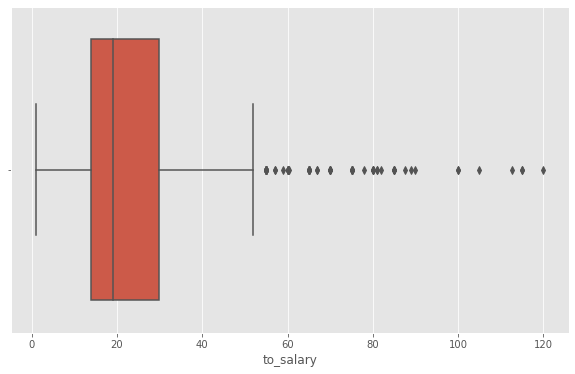

In [64]:
filt_notnull = df['to_salary'].notnull()

filt_hourly = df['yearly_hourly'] == 'hour'

graph_outliers = df.loc[filt_notnull & filt_hourly, 'to_salary']

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(graph_outliers)

C:\Users\jorge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='to_salary', ylabel='Density'>

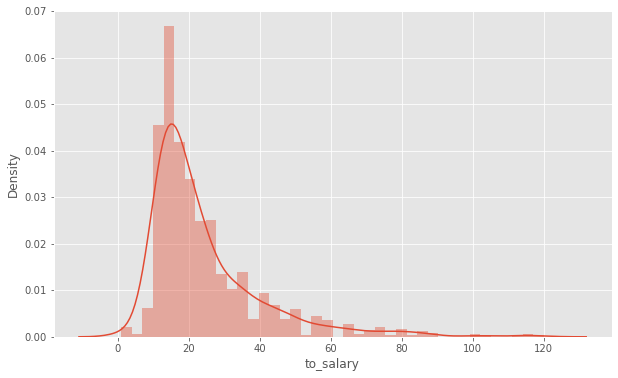

In [65]:
filt_notnull = df['to_salary'].notnull()

filt_hourly = df['yearly_hourly'] == 'hour'

graph_outliers = df.loc[filt_notnull & filt_hourly, 'to_salary']

fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(graph_outliers)

# 'To_salary' yearly outliers
We have some ridiculously low "yearly" salaries which I believe are hourly.\
I am going to change the classification.\
I believe the biggest value out of the values I believe are "hourly" is 800.\
But 800 is another outlier, so all the values smaller than 800 are going to be hourly.\
I will classify 800 as an hourly_outlier.\
Also, anything below the 9 dollar mark must be a mistake. So I am adding those numbers to the outlier classification.

In [69]:
filt_notnull = df['to_salary'].notnull()

filt_hourly = df['yearly_hourly'] == 'year'

graph_outliers = df.loc[filt_notnull & filt_hourly, ['to_salary', 'copy_to_salary', 'job_title']]

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(graph_outliers.sort_values(by='to_salary', ascending=False))

         to_salary                                     copy_to_salary  \
id                                                                      
5504   1000000.000                               1,000,000.00 $ /year   
5690   1000000.000                               1,000,000.00 $ /year   
9560   1000000.000                            $1,000,000.00+ /yearDOE   
5666   1000000.000                               1,000,000.00 $ /year   
5416   1000000.000                               1,000,000.00 $ /year   
5722   1000000.000                               1,000,000.00 $ /year   
12099  1000000.000                               1,000,000.00 $ /year   
5539   1000000.000                               1,000,000.00 $ /year   
5531   1000000.000                               1,000,000.00 $ /year   
9401   1000000.000                            $1,000,000.00+ /yearDOE   
21118   950000.000                                 950,000.00 $ /year   
6823    950000.000                                 

In [67]:
filt_notnull = df['to_salary'].notnull()

filt_hourly = df['yearly_hourly'] == 'year'

graph_outliers = df.loc[filt_notnull & filt_hourly, 'to_salary']

mean_yearly = graph_outliers.mean()
median_yearly = graph_outliers.median()
mode_yearly = graph_outliers.mode()
min_yearly = graph_outliers.min()
max_yearly = graph_outliers.max()

print('Mean: ', mean_yearly, '\nMedian: ', median_yearly, '\nMode: ', mode_yearly, '\nMin: ', min_yearly, '\nMax: ', max_yearly)

Mean:  85525.40623712394 
Median:  75000.0 
Mode:  0    100000.0
dtype: float64 
Min:  0.01 
Max:  1000000.0


800 as an hourly outlier

In [76]:
eight_outlier = df['to_salary'] == 800

eight_index = df.index[eight_outlier]

df.loc[eight_index, 'yearly_hourly'] = 'outliers_hourly'

print(df.loc[eight_index, ['to_salary', 'yearly_hourly']])

      to_salary    yearly_hourly
id                              
3447      800.0  outliers_hourly


In [78]:
filt_notnull = df['to_salary'].notnull()

filt_hourly = df['yearly_hourly'] == 'year'

filt_outliers = df['to_salary'] < 9

filters_1 = filt_notnull & filt_hourly & filt_outliers

for i in df.index[filters_1]:
    df.loc[i, 'yearly_hourly'] = 'outliers_hourly'

In [80]:
filters_1 = filt_notnull & filt_hourly & filt_outliers

df.loc[filters_1, ['to_salary', 'yearly_hourly']]

,to_salary,yearly_hourly
id,,
1968,1.000,outliers_hourly
2764,2.005,outliers_hourly
4509,1.000,outliers_hourly
4755,2.000,outliers_hourly
7318,1.000,outliers_hourly
10629,1.000,outliers_hourly
13536,2.000,outliers_hourly
20069,0.010,outliers_hourly


In [87]:
filt_notnull = df['to_salary'].notnull()

filt_hourly = df['yearly_hourly'] == 'year'

hourly_in_yearly = df['to_salary'] < 800

filts = filt_notnull & filt_hourly & hourly_in_yearly

yearly_really_hourly = df.index[filts]

df.loc[yearly_really_hourly, 'yearly_hourly'] = 'hour'

# Rounding numbers in 'To_Salary' column

In [96]:
df_notna = df['to_salary'].notnull()

numbers_round = df.loc[df_notna, 'to_salary'].round(decimals=2)

df.loc[df_notna, 'to_salary'] = numbers_round

In [97]:
df_notna = df['to_salary'].notnull()

df.loc[df_notna, 'to_salary']

id
13           13.0
14        95000.0
19        72000.0
29       100000.0
30           81.0
           ...   
21987     80000.0
21995    160000.0
21996     60000.0
21998        28.0
21999     46000.0
Name: to_salary, Length: 3015, dtype: float64

# Look for outliers in 'From_Salary' column

In [105]:
filt_notnull = df['from_salary'].notnull()

filt_yearly = df['yearly_hourly'] == 'year'

graph_outliers = df.loc[filt_notnull & filt_yearly, 'from_salary']

print('Max value: ', graph_outliers.max(), '\nMin_value: ', graph_outliers.min(), '\nMean: ', graph_outliers.mean(), '\nMedian: ', graph_outliers.median())

Max value:  850000.0 
Min_value:  0.0 
Mean:  61609.27293233083 
Median:  60000.0


Next block code shows how the smallest 3 salaries in the 'from_salary' column are not correct.\
The job description doesn't align with how small the salary is.\
I am adding those as yearly outliers.\
Smaller than 5,001

In [127]:
filt_notnull = df['from_salary'].notnull()

filt_yearly = df['yearly_hourly'] == 'year'

graph_outliers = df.loc[filt_notnull & filt_yearly, ['from_salary', 'job_title']]

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(graph_outliers.sort_values(by='from_salary').head(5))

       from_salary                                          job_title
id                                                                   
21907      17000.0           Part-Time Receptionist Job in Cincinnati
14446      19000.0      Customer Care Representative Job in Charlotte
11457      19000.0   Customer Service Representative Job in Charlotte
1937       20000.0  warehouse associate/shipping-receiving/Record ...
19377      20000.0   Assistant Restaurant Managers Job in Tampa Palms


In [124]:
filt_notnull = df['from_salary'].notnull()

filt_yearly = df['yearly_hourly'] == 'year'

smaller_than = df['from_salary'] < 5001

index_smallerthan_5001 = df.index[filt_notnull & filt_yearly & smaller_than]

df.loc[index_smallerthan_5001, 'yearly_hourly'] = 'from salary yearly outlier'

In [125]:
df.loc[index_smallerthan_5001, 'yearly_hourly']

id
166      from salary yearly outlier
422      from salary yearly outlier
2073     from salary yearly outlier
2285     from salary yearly outlier
2322     from salary yearly outlier
                    ...            
20996    from salary yearly outlier
21008    from salary yearly outlier
21049    from salary yearly outlier
21798    from salary yearly outlier
21905    from salary yearly outlier
Name: yearly_hourly, Length: 79, dtype: object

# Stopped here. I have to modify the 850,000 outlier in the yearly classif from 'from_salary' column

C:\Users\jorge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='from_salary'>

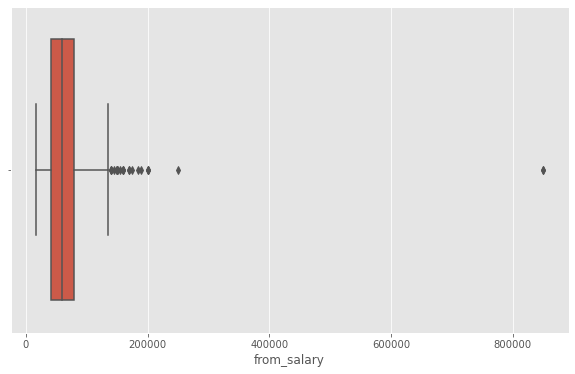

In [126]:
filt_notnull = df['from_salary'].notnull()

filt_yearly = df['yearly_hourly'] == 'year'

graph_outliers = df.loc[filt_notnull & filt_yearly, 'from_salary']

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(graph_outliers)

In [109]:
df.columns

Index(['country', 'country_code', 'date_added', 'has_expired', 'job_board',
       'job_description', 'job_title', 'job_type', 'location', 'organization',
       'page_url', 'salary', 'from_salary', 'to_salary', 'yearly_hourly',
       'sector', 'uniq_id', 'salary_copy', 'copy_from_salary',
       'copy_to_salary'],
      dtype='object')

In [98]:
df['yearly_hourly'].value_counts()

year               1679
hour               1207
uptohour             54
upto                 47
month                17
outliers_hourly      14
Name: yearly_hourly, dtype: int64

# Changes pending

# Changes pending
Empty cells by column
What can we do about these columns?

-> date_added:
 <br />-> job_type: 
 <br />-> organization: 
 <br />-> salary:
 <br />-> sector: 